# Step 1: Import The key Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Step 2: Read the DataSet

In [ ]:
dataset_df = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (617, 58)


# Step 3. Basic Data View / Exploration

In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

# Observations:
1. Key Features: 56
2. Target -Class - 0,1
3. Number Rows - 617
4. Missing Values exist in - BQ,CC, etc - Explore Further
5. There exist one Categorical Feature - EJ

In [ ]:
dataset_df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [ ]:
dataset_df.sample(10)

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
480,c1ffde2da7d9,0.632404,3093.42550,85.200147,90.788555,8.138688,4.695270,0.025578,3.396778,1.229900,...,1.633415,1.16290,0.426699,10.827528,118.061993,6016.454496,41.396125,22.697900,3.564000,0
314,7cc870296984,1.311811,2436.50198,145.300956,24.717157,8.138688,4.101717,0.063945,3.396778,9.417520,...,0.173229,1.32414,0.325104,18.176108,115.743068,21724.166470,29.265665,95.464924,21.978000,0
435,acd97f3380e4,0.692226,2709.13434,124.730298,30.189556,8.138688,6.896731,0.048720,20.279836,1.229900,...,7.195424,1.28557,0.081276,20.389984,72.611063,595.765044,31.286168,55.263278,0.125788,0
432,ac2074c4eeb5,0.141009,2025.32946,85.200147,12.186695,8.138688,5.873517,0.025578,12.402336,1.229900,...,0.173229,0.49706,0.121914,16.929640,197.996442,37942.945340,33.310392,116.773944,21.978000,0
414,a20c68851e9b,0.476440,4892.30588,85.200147,52.347043,8.138688,4.757283,0.025578,10.360488,1.229900,...,1.680511,0.49706,0.176098,24.408448,128.084166,24212.782200,62.475590,13.184072,0.257196,0
218,582ef2696f72,0.743502,7052.62536,85.200147,20.505237,8.138688,4.287756,0.043239,8.589626,7.382914,...,9.390132,0.49706,0.717938,8.883410,72.611063,10970.070730,42.858478,43.812734,0.092564,1
238,5fe47095520d,0.205104,2448.53785,85.200147,11.889383,8.138688,3.756216,0.052069,13.190086,5.987856,...,10.791274,1.74203,0.291239,23.896838,72.611063,2629.423539,28.260995,64.796396,0.076761,1
123,312661adb2ff,0.670861,1418.86415,124.294848,16.237571,10.792152,4.588962,0.166866,12.704832,10.756354,...,4.193459,4.20935,0.067730,19.190026,72.611063,16164.484420,12.830008,23.441208,1.009800,0
205,4fef9a973791,0.260653,2056.42404,85.200147,33.682972,10.278240,4.890168,0.025578,11.765834,3.232880,...,0.173229,0.49706,0.257374,18.864456,175.394653,31694.918170,28.994032,191.194764,21.978000,0
209,51111505c6f2,0.269199,3032.58912,85.200147,20.703445,8.138688,3.986550,0.135198,15.049176,7.316148,...,0.173229,1.20872,0.880490,35.933626,72.611063,124340.327900,33.529931,7.767440,21.978000,0


# Quick Descreptive Statistics Analysis

In [ ]:
dataset_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


# Observation

1. Data is Skewed or not
 Feature AB looks Right Skewed distribution

2. Outlier Exist or not
Feature AB looks outlier Exist - based on Std - 3 Sigma
IQR --> Q3 + 1.5* IQR or Q1-1.5* IQR
IQR = 0.3, Q3 = 0.55
Outlier exist from Tukey Fench

Note: We need to do data transformation

# Step 4: Data PreProcessing
1. Data Cleaning not required
    a. Drop ID - Not useful
2. Missing value handling is required
3. Encoding - one Feature is required

In [ ]:
# Drop ID - Not useful
dataset_df.drop(['Id'], axis=1, inplace=True)

In [ ]:
dataset_df.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

## Missing value Handling

In [ ]:
dataset_df.drop_duplicates(inplace=True)

In [ ]:
dataset_df.shape

(617, 57)

In [ ]:
dataset_df.isnull().sum()

AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [ ]:
lst = list(dataset_df.isnull().sum())
lst

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 60,
 0,
 0,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 60,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0]

In [ ]:
cols = list(dataset_df.columns)
cols

['AB',
 'AF',
 'AH',
 'AM',
 'AR',
 'AX',
 'AY',
 'AZ',
 'BC',
 'BD ',
 'BN',
 'BP',
 'BQ',
 'BR',
 'BZ',
 'CB',
 'CC',
 'CD ',
 'CF',
 'CH',
 'CL',
 'CR',
 'CS',
 'CU',
 'CW ',
 'DA',
 'DE',
 'DF',
 'DH',
 'DI',
 'DL',
 'DN',
 'DU',
 'DV',
 'DY',
 'EB',
 'EE',
 'EG',
 'EH',
 'EJ',
 'EL',
 'EP',
 'EU',
 'FC',
 'FD ',
 'FE',
 'FI',
 'FL',
 'FR',
 'FS',
 'GB',
 'GE',
 'GF',
 'GH',
 'GI',
 'GL',
 'Class']

In [ ]:
missing_col = []
missing_rows = []
for i in range(len(lst)):
    if lst[i]>0:
        missing_col.append(cols[i])
        missing_rows.append(lst[i])
missing_col,missing_rows

(['BQ', 'CB', 'CC', 'DU', 'EL', 'FC', 'FL', 'FS', 'GL'],
 [60, 2, 3, 1, 60, 1, 1, 2, 1])

# Missing value handling for BQ

In [ ]:
dataset_df.BQ.unique(), dataset_df.BQ.max()-dataset_df.BQ.min()

(array([152.707705 ,  14.75472  , 219.32016  ,  11.05041  , 149.717165 ,
         16.52612  , 344.644105 ,   6.1999   ,         nan, 107.276505 ,
         28.949365 , 101.58979  ,  73.244785 , 109.751255 ,  37.879305 ,
          5.681505 , 135.697055 ,  51.727485 ,  30.0109025,  32.987115 ,
         86.60583  ,  26.156805 ,  29.090035 ,   7.57534  ,  80.314755 ,
        193.41083  ,  72.28875  , 102.8454   , 107.979855 ,  31.92167  ,
        173.141325 ,  47.158315 ,  46.731095 , 224.09252  ,  31.6247   ,
        132.190725 ,  29.47297  ,  26.703855 ,  23.848775 ,  27.740645 ,
         68.26663  ,  29.360955 , 228.950845 ,  44.032315 , 167.33478  ,
          5.139665 ,  17.04191  , 222.631115 ,  54.9655   ,  25.008    ,
         29.980945 ,  91.75331  ,  37.53284  ,   5.285545 ,  17.7726125,
        107.81053  ,  31.064625 ,  14.85371  ,  44.735665 ,   2.93323  ,
        143.73869  ,  66.826065 ,  27.834425 , 206.157095 ,  70.53819  ,
        209.830145 , 128.15037  ,  40.83598  ,  17.

In [ ]:
dataset_df.BQ.mean()

98.32873688509873

In [ ]:
dataset_df.BQ.fillna(dataset_df.BQ.median(),inplace=True) # Filling Missing values using Mean

/tmp/ipykernel_34/2588932856.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df.BQ.fillna(dataset_df.BQ.median(),inplace=True) # Filling Missing values using Mean


In [ ]:
dataset_df.isnull().sum()

AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ        0
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [ ]:
dataset_df.CC.unique(), dataset_df.CC.max()-dataset_df.CC.min()

(array([0.56348064, 0.48471012, 0.49585158, 0.71788212, 0.53646696,
        0.63946044, 0.94632336, 0.77190948, 0.85549644, 0.71827074,
        0.76902696, 0.6598278 , 0.32973642, 0.44362044, 0.50394528,
        0.65160864, 0.55128654, 0.8305299 , 0.57493728, 0.38906064,
        0.7247916 , 0.7388676 , 0.71639496, 0.78043158,        nan,
        0.60876864, 0.59063202, 0.76395348, 0.79105896, 0.60439896,
        0.58534128, 0.39046212, 0.75027222, 0.65330694, 0.77776632,
        0.75997854, 0.60527412, 0.56698128, 0.71499348, 0.69549516,
        0.7075638 , 0.56488212, 0.63561096, 0.47963664, 0.61672464,
        0.71525664, 0.65038464, 0.88766928, 0.669528  , 0.17687412,
        0.61506612, 0.71105832, 0.49921452, 0.78597324, 0.74034864,
        0.94851432, 0.42079284, 0.74681748, 0.6297939 , 0.58861854,
        0.39343644, 0.8281278 , 0.43505244, 0.67871412, 0.9241659 ,
        0.56759328, 0.49777326, 0.66183516, 0.60160212, 0.63683496,
        0.43539516, 0.62966844, 0.50945328, 0.62

In [ ]:
dataset_df.CC.fillna(dataset_df.CC.mean(),inplace=True) # Filling Missing values using Mean

/tmp/ipykernel_34/4286791961.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_df.CC.fillna(dataset_df.CC.mean(),inplace=True) # Filling Missing values using Mean


In [ ]:
dataset_df.isnull().sum()

AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ        0
BR        0
BZ        0
CB        2
CC        0
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [ ]:
dataset_df.EL.unique(), dataset_df.EL.max()-dataset_df.EL.min()

In [ ]:
dataset_df.EL.fillna(dataset_df.EL.mean(),inplace=True) # Filling Missing values using Mean

In [ ]:
dataset_df.isnull().sum()

In [ ]:
lst = list(dataset_df.isnull().sum())
lst

In [ ]:
missing_col = []
missing_rows = []
for i in range(len(lst)):
    if lst[i]>0:
        missing_col.append(cols[i])
        missing_rows.append(lst[i])
missing_col,missing_rows

In [ ]:
dataset_df.CB.fillna(dataset_df.CB.mean(),inplace=True)
dataset_df.DU.fillna(dataset_df.DU.mean(),inplace=True)
dataset_df.FC.fillna(dataset_df.FC.mean(),inplace=True)
dataset_df.FL.fillna(dataset_df.FL.mean(),inplace=True)
dataset_df.FS.fillna(dataset_df.FS.mean(),inplace=True)
dataset_df.GL.fillna(dataset_df.GL.mean(),inplace=True)

In [ ]:
dataset_df.isnull().sum()

In [ ]:
dataset_df.info()

# Encoding Categorical value - EJ

In [ ]:
dataset_df.EJ.value_counts()

In [ ]:
dataset_df.EJ.replace({"B":1, "A":0}, inplace=True)

In [ ]:
dataset_df.EJ.value_counts()

In [ ]:
dataset_df.info()

# Step 5 EDA ( Explorative Data Analytics )

# Pie chart for label column: Class

In [ ]:
plot_df = dataset_df.Class.value_counts()
plot_df.plot(kind="pie")

In [ ]:
plot_df = dataset_df.Class.value_counts()
plot_df.plot(kind="bar")

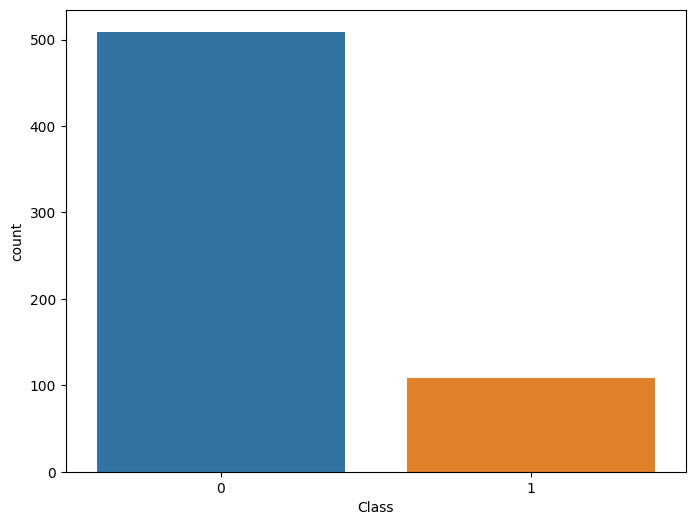

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Class", data=dataset_df)
plt.show()

### Observation

- Class is imbalanced - balancing the Class is essential - using Sampling Tech - undersample / oversample

# Univariate Analysis - One by Feature Analysis

- BarPlot, Hist Plot, KDE Plot, Box Plot, Vilion Plot,

# AB

In [ ]:
dataset_df.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

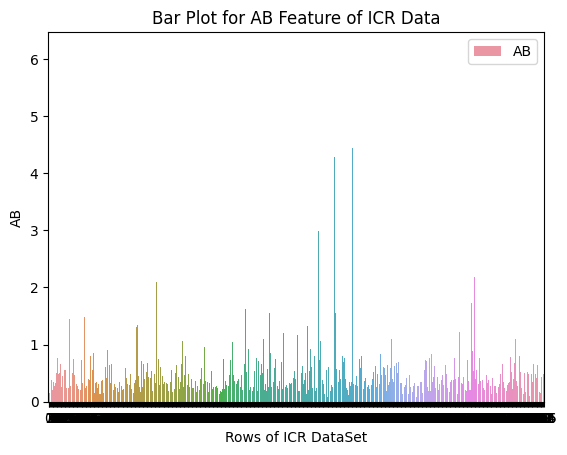

In [ ]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
plt.xlabel('Rows of ICR DataSet')
plt.title("Bar Plot for AB Feature of ICR Data")
sns.barplot(data=dataset_df, x=dataset_df.index, y='AB',label='AB')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

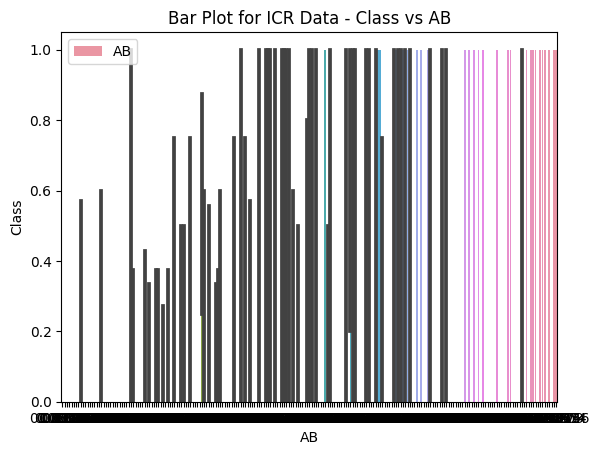

In [ ]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
plt.ylabel('Class')
plt.title("Bar Plot for ICR Data - Class vs AB")
sns.barplot(data=dataset_df, x='AB',y='Class', label='AB')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

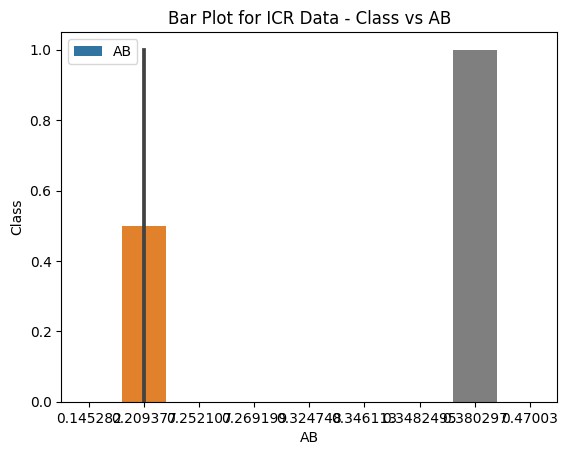

In [ ]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
plt.ylabel('Class')
plt.title("Bar Plot for ICR Data - Class vs AB")
sns.barplot(data=dataset_df.iloc[:10,:], x='AB',y='Class', label='AB')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AB', ylabel='Count'>

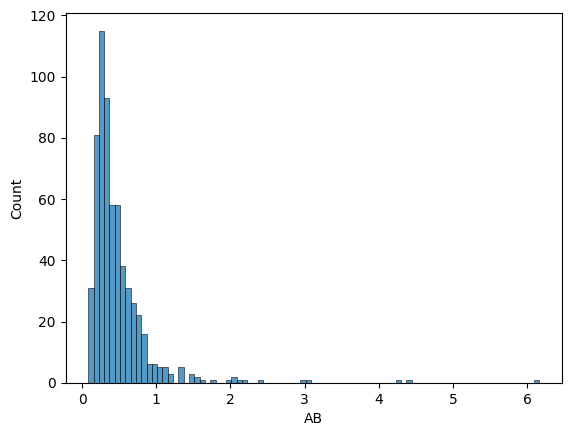

In [ ]:
sns.histplot(data = dataset_df,x="AB")

# observation
- Right Skewed Distribution
- Outlier Exist

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AB', ylabel='Density'>

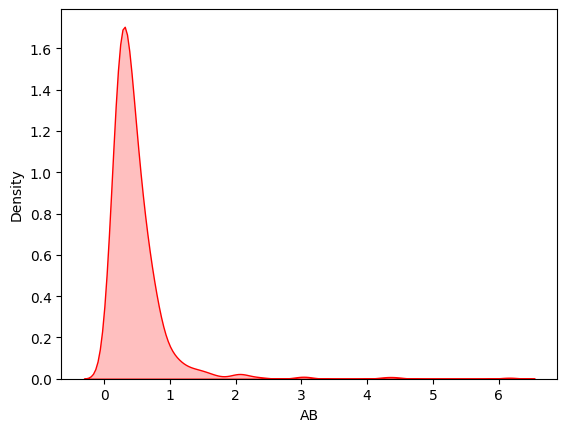

In [ ]:
sns.kdeplot(data =dataset_df, x="AB",fill="True", color ="r")

<Axes: title={'center': 'Box Plot for ICR Data '}, xlabel='Class', ylabel='AB'>

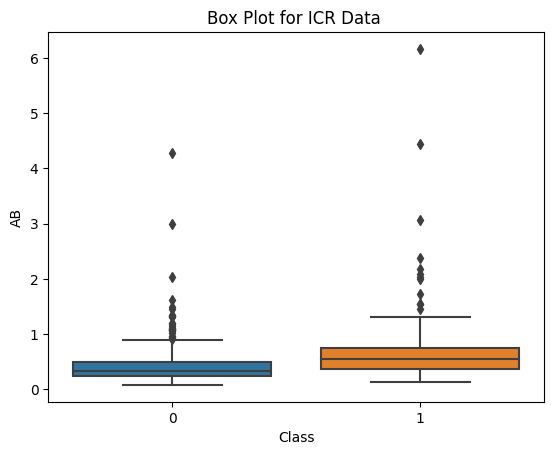

In [ ]:
# Draw a nested boxplot to show bills by day and time
plt.title("Box Plot for ICR Data ")
sns.boxplot(x="Class",y="AB",data=dataset_df)

<Axes: xlabel='AB'>

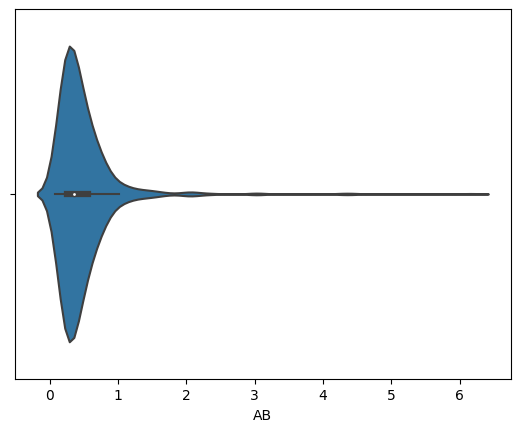

In [ ]:
sns.violinplot(x = "AB",data = dataset_df)

<Axes: xlabel='Class', ylabel='AB'>

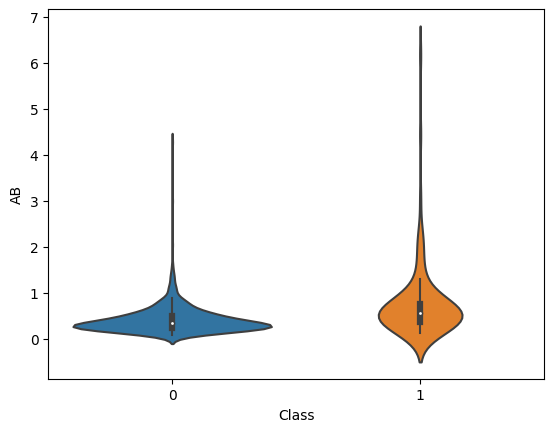

In [ ]:
sns.violinplot(x = "Class", y = "AB",data = dataset_df)

In [ ]:
# Store all the numerical column names into a list
NUM_FEATURE_COLUMNS = [i for i in dataset_df.columns if i not in ["EJ", "Class"]]

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.25, wspace=0.3)

for i, column_name in enumerate(NUM_FEATURE_COLUMNS[:6]):
    row = i//2
    col = i % 2
    bp = sns.barplot(ax=axis[row, col], x=dataset_df.index, y=dataset_df[column_name])
    bp.set(xticklabels=[])
    #bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
    axis[row, col].set_title(column_name)
plt.show()

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.25, wspace=0.3)

for i, column_name in enumerate(NUM_FEATURE_COLUMNS[6:12]):
    row = i//2
    col = i % 2
    bp = sns.barplot(ax=axis[row, col], x=dataset_df.index, y=dataset_df[column_name])
    bp.set(xticklabels=[])
    #bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 7)
    axis[row, col].set_title(column_name)
plt.show()

# Analytics

# 1. Univariate Analysis:

- Data consists of only one variable (only x value).

>- a. Line Plots / Bar Charts
>- b. Histograms
>- c. Box Plots
>- d. Count Plots
>- e. Descriptive Statistics techniques
>- f. Violin Plot

# 2. Bivariate Analysis:

- When we talk about bivariate analysis, it means analyzing 2 variables. Since we know there are numerical and categorical variables, there is a way of analyzing these variables as shown below:

i) Numerical & Numerical

   >- a. Scatterplot
   >- b. Line plot
   >- c. Heatmap for correlation
   >- d. Joint plot

ii) Numerical & Categorical

   >- a. Bar chart
   >- b. Violin plot
   >- c. Categorical box plot
   >- d. Swarm plot

iii) Categorical & Categorical

   >- a. Bar chart
   >- b. Grouped bar chart
   >- c. Point plot

3. Multivariate Analysis:
In the case of 3 or more variables

   >- a. Pair Plot
   >- b. GridPlot/Joint
   
   
2 Most important Plots

- Scatter Plot / Pair Plot
>> Correlation  
- HeatMap
>> Correlation Coff with Color map


- Covariance
- Feature Importance


# Read Made tools for Analysis
- Pandas Profiling
- sweetviz

# sweetviz

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
#my_report = sv.analyze(dataset_df)
#my_report.show_notebook() # if working in Kaggle

# Multivariate Analysis

In [ ]:
## Scatter pair Plot, Joint Plots
## HeatMap
## Correlation
## Feature Importance

# Correlation & Covariance

In [ ]:
dataset_df.corr()

In [ ]:
dataset_df.cov()

# Scatter Plot - Pair Plot

In [ ]:
sns.scatterplot(x=dataset_df["AB"], y=dataset_df["AM"])

In [ ]:
sns.scatterplot(x=dataset_df["BC"], y=dataset_df["BZ"])

In [ ]:
# Pair Plot - for All Feature

In [ ]:
sns.pairplot(data=dataset_df.iloc[:,:5])

# Few Joint Plots

In [ ]:
sns.jointplot(data=dataset_df,
      x='AM',
      y = 'AF',
      hue ="Class")

# Joint Plot = DA vs BR

In [ ]:
sns.jointplot(data=dataset_df,
      x='BC',
      y = 'BZ', hue ="Class")

In [ ]:
sns.jointplot(data=dataset_df,
      x='DA',
      y = 'BR', hue ="Class")

In [ ]:
sns.jointplot(data=dataset_df,
      x='AM',
      y = 'AF',
      kind="reg")

# Heat Map

In [ ]:
sns.heatmap(dataset_df.corr(),annot =True)

In [ ]:
plt.figure(figsize=(15, 15))

sns.heatmap(dataset_df.iloc[:,:15].corr(),annot =True)

# Observation

1. How Feature is correlated with Class/Target
2. How each feature is correlated with Other - Correlation is close to 1.. Then drop one of these two

# Box Plot - Using CataPlot

In [ ]:
sns.catplot(x="DA", y="BR", hue= 'Class', data = dataset_df, kind ="box")

# Handling Outliers - By Data Transformation Ways

# Handling Outliers:

Once we’ve identified the outliers, we need to handle them correctly. Here are some common methods for handling outliers:

1. Removing outliers: One of the simplest methods to handle outliers is to remove them from the dataset. It should be used with caution, though, since it can lead to loss of information and bias.

2. Transforming data: Transforming data is another method to handle outliers. To reduce the impact of outliers, we can use mathematical functions like logarithms, square roots, or reciprocals. Transforming data can also help to normalize the distribution and make it easier to analyze.

3. Winsorization: Winsorization is a method that replaces extreme values with less extreme values. In this method, we replace the extreme values with the maximum or minimum values of the dataset. This method can be useful when we have a small number of outliers that are very different from the rest of the data.

4. Robust statistical methods: Robust statistical methods are designed to handle outliers and are less sensitive to extreme values. For example, instead of calculating the mean, we can use the median or mode, which are less affected by outliers.

## IsolationForest

In [ ]:
# Store all the numerical column names into a list
NUM_FEATURE_COLUMNS = [i for i in dataset_df.columns if i not in ["EJ", "Class"]]
NUM_FEATURE_COLUMNS

In [ ]:
from sklearn.ensemble import IsolationForest
# Create an Isolation Forest model
iso_forest = IsolationForest(contamination=0.05) # Adjust contamination based on your dataset
# Fit the model to your data
iso_forest.fit(dataset_df)
# Predict outliers
outliers = iso_forest.predict(dataset_df)
outliers

In [ ]:
from sklearn.ensemble import IsolationForest
# Create an Isolation Forest model
iso_forest = IsolationForest(contamination=0.05) # Adjust contamination based on your dataset
# Fit the model to your data
iso_forest.fit(dataset_df)
# Predict outliers
outliers = iso_forest.predict(dataset_df)
dataset_df['outliers'] =outliers

In [ ]:
from sklearn.ensemble import IsolationForest
# Create an Isolation Forest model
iso_forest = IsolationForest(contamination=0.05) # Adjust contamination based on your dataset
df_list_iso = []
df_list_iso_out = []
for i in NUM_FEATURE_COLUMNS:
    # Fit the model to the feature data and predict outliers
    outliers = iso_forest.fit_predict(dataset_df[[i]])
    #outliers_2 = dataset_df[(dataset_df[i]>upper)|(dataset_df[i]<lower)]
    #print(outliers)
    # Filter out rows with outliers
    dataset_df_1 = dataset_df[outliers == -1]
    print(dataset_df_1.shape)
    df_list_iso.append(outliers)
    df_list_iso_out.append(dataset_df_1)
    #dataset_df_outlier_removed = dataset_df[outliers == 1]
    #print(dataset_df_1.shape)

## zscore

In [ ]:
# Store all the numerical column names into a list
NUM_FEATURE_COLUMNS = [i for i in dataset_df.columns if i not in ["EJ", "Class"]]
NUM_FEATURE_COLUMNS

In [ ]:
from scipy.stats import zscore
# Calculate Z-scores for each data point
z_scores = zscore(dataset_df)
# Define a threshold for identifying outliers
threshold = 3
# Identify outliers
outliers_1 = (z_scores > threshold) | (z_scores < -threshold)
outliers_1

In [ ]:

# Calculate Z-scores for each data point
z_scores = zscore(dataset_df)
# Define a threshold for identifying outliers
threshold = 3
# Identify outliers
outliers_1 = (z_scores > threshold) | (z_scores < -threshold)
outliers_1

In [ ]:
from scipy.stats import zscore
df_list_z = []
for i in NUM_FEATURE_COLUMNS:
    # Calculate Z-scores for each data point
    z_scores = zscore(dataset_df[i])
    #print('ZScore value of {} is {}'.format(i,z_scores))
    threshold = 3
    outliers_2 = dataset_df[(z_scores > threshold) | (z_scores < -threshold)]
    print(outliers_2.shape)
    df_list_z.append(outliers_2)
    #dataset_df_outlier_2 = dataset_df[~outliers_2.index]

In [ ]:
df_list_z[0].head()

# IQR Method

In [ ]:
Upper_Limit = []
Lower_Limit = []
df_list_iqr = []
for i in NUM_FEATURE_COLUMNS:
    # the boundary values are:
    q1 = dataset_df[i].quantile(0.25)
    q3 = dataset_df[i].quantile(0.75)
    iqr = q3 - q1
    lower = round(q1-1.5*iqr,3)
    upper = round(q3+1.5*iqr,3)
    print('Upper Fench value of {} is {}'.format(i,upper))
    print('Lower Fench of {} is {}'.format( i,lower ))
    Upper_Limit.append(upper)
    Lower_Limit.append(lower)
    outliers_2 = dataset_df[(dataset_df[i]>upper)|(dataset_df[i]<lower)]
    print(outliers_2.shape)
    df_list_iqr.append(outliers_2)

# Std Division

In [ ]:
Upper_Limit = []
Lower_Limit = []
df_list = []
for i in NUM_FEATURE_COLUMNS:
    # the boundary values are:
    lower = round(dataset_df[i].mean()-3*dataset_df[i].std(),3)
    upper = round(dataset_df[i].mean()+3*dataset_df[i].std(),3)
    print('Highest value of {} is {}'.format(i,upper))
    print('Lowest value of {} is {}'.format( i,lower ))
    Upper_Limit.append(upper)
    Lower_Limit.append(lower)
    outliers_2 = dataset_df[(dataset_df[i]>upper)|(dataset_df[i]<lower)]
    print(outliers_2.shape)
    df_list.append(outliers_2)

# Visualization

- Presence of outliers can also be detected by using various visualization methods. Some of the famous plots include:

>- Scatter plot

>- Box and Whisker plot

>- Histogram

>- Distribution Plot

>- QQ plot

# Outlier Treatment:

## Removing Elements -

In [ ]:
for i in range(len(NUM_FEATURE_COLUMNS)):
    # Get the indices of df2
    indices_to_remove = df_list_z[i].index
    print(indices_to_remove)
    print(dataset_df.index)
    indices_to_remove_new = indices_to_remove[indices_to_remove.isin(dataset_df.index)]
    # Remove rows from df1 based on the indices of df2
    print(indices_to_remove_new)
    dataset_df = dataset_df.drop(indices_to_remove_new)
dataset_df.shape

In [ ]:
dataset_df.head()

In [ ]:
dataset_df.info()

## Class Balancing

In [ ]:
# Calculate the number of samples for each label.
neg, pos = np.bincount(dataset_df['Class'])

# Calculate total samples.
total = neg + pos

# Calculate the weight for each label.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

# Imbalanced Classification : Over & Under Sampling

<h2><center>Imbalanced Classification</center></h2>
<div style="font-family:verdana; word-spacing:1.5px;">
Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance. The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.
</div>    
    
<h3><center>1. Over Sampling Methods </center></h3>
<div style="font-family:verdana; word-spacing:1.5px;">
    A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary. One way to solve this problem is to oversample the examples in the minority class.<br><br>
    The most widely used approach to synthesizing new examples is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short.<br><br>
    SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.<br>
Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k = 5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

<h3>1.1. SMOTE for Balancing Data</h3>

In [ ]:
!pip install -q imblearn

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [ ]:
X = dataset_df.drop(["Class","outliers"],axis=1)
X

In [ ]:
y = dataset_df["Class"]

In [ ]:
from imblearn.over_sampling import SMOTE

counter = Counter(y)
print(counter)

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

In [ ]:
X.head()

# Basic Classification Model

In [ ]:
# define model
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(model, X, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
conf_mat

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
scores = cross_val_score(model, X, y, scoring = 'accuracy',cv=10)
print('Mean Accuracy : %.3f' % np.mean(scores))

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat)
plt.show()

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
class_names = ['class a', 'class b']

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names)
plt.show()

In [ ]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                fontcolor_threshold=1,
                                cmap='summer',class_names=class_names)

plt.show()

# Classification

In [ ]:
X = dataset_df.drop(["Class","outliers"],axis=1)
X

In [ ]:
y = dataset_df["Class"]

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

In [ ]:
X = dataset_df.drop(["Class","outliers"],axis=1)
X

In [ ]:
y = dataset_df["Class"]

In [ ]:
from imblearn.over_sampling import SMOTE

counter = Counter(y)
print(counter)

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

In [ ]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

In [ ]:
X = dataset_df.drop(["Class","outliers"],axis=1)
X

In [ ]:
y = dataset_df["Class"]

In [ ]:
k_values = [1,2,3,5,7]
for k in tqdm(k_values):
    over = SMOTE(sampling_strategy=0.55, k_neighbors=k)
    steps = [('over', over), ('model', DecisionTreeClassifier())]
    pipeline = Pipeline(steps=steps)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1,error_score='raise')

    print('k_neighbours :%d, Mean ROC AUC: %.3f' % (k,np.mean(scores)))

<h3>1.2. Border Line SMOTE</h3>
<div style="font-family:verdana; word-spacing:1.5px;">
A popular extension to SMOTE involves selecting those instances of the minority class that are misclassified, such as with a k-nearest neighbor classification model. We can then oversample just those difficult instances, providing more resolution only where it may be required.<br><br>
The examples on the borderline and the ones nearby are more apt to be misclassified than the ones far from the borderline, and thus more important for classification.
    </div>

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]

counter = Counter(y)
print(counter)

oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)


In [ ]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

In [ ]:
k_values = [1,2,3,5,7]
for k in tqdm(k_values):
    over = BorderlineSMOTE(k_neighbors=k)
    steps = [('over', over), ('model', DecisionTreeClassifier())]
    pipeline = Pipeline(steps=steps)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1,error_score='raise')

    print('k_neighbours :%d, Mean ROC AUC: %.3f' % (k,np.mean(scores)))

<h3>1.3. Adaptive Synthetic Sampling (ADASYN)</h3>
<div style="font-family:verdana; word-spacing:1.9px;">
Another approach involves generating synthetic samples inversely proportional to the density of the examples in the minority class. That is, generate more synthetic examples in regions of the feature space where the density of minority examples is low, and fewer or none where the density is high.

In [ ]:
from imblearn.over_sampling import ADASYN

X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
counter = Counter(y)
print(counter)

oversample = ADASYN()
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

In [ ]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

In [ ]:
X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
over = ADASYN()
steps = [('over', over), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1,error_score='raise')

print('Mean Accuracy: %.3f' % (np.mean(scores)))

<h3><center>2. Under Sampling Methods </center></h3>
<div style="font-family:verdana; word-spacing:1.5px;">
    There are many different types of undersampling techniques, although most can be grouped into ,
<ul>
  <li>those that select examples to keep in the transformed dataset,
  <li>those that select examples to delete,
  <li>and hybrids that combine both types of methods.
</ul>
    
<h3><center>2.1. Methods that Select Examples to Keep </center></h3>
    <h3>2.1.1 Near Miss Undersampling</h3>
    
<ul>
    <li>NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.
    <li>NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples.
    <li>NearMiss-3: Majority class examples with minimum distance to each minority class example.
    </ul>
    </div>

In [ ]:
from imblearn.under_sampling import NearMiss

X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
counter = Counter(y)
print(counter)

undersample = NearMiss(version=1, n_neighbors=3)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

In [ ]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

In [ ]:
X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
counter = Counter(y)
print(counter)

undersample = NearMiss(version=2, n_neighbors=3)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

In [ ]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

In [ ]:
X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
counter = Counter(y)
print(counter)

undersample = NearMiss(version=3, n_neighbors=3)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

In [ ]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

<div style="font-family:verdana; word-spacing:1.9px;">
<h3>2.1.2. Condensed Nearest Neighbor Rule Undersampling</h3>
    Condensed Nearest Neighbors, or CNN for short, is an undersampling technique that seeks a subset of a collection of samples that results in no loss in model performance.<br><br>
   It is achieved by enumerating the examples in the dataset and adding them to the store only if they cannot be classified correctly by the current contents of the store. This approach was proposed to reduce the memory requirements for the k-Nearest Neighbors (KNN) algorithm</div>

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour

X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
counter = Counter(y)
print(counter)

undersample = CondensedNearestNeighbour(n_neighbors=1)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

In [ ]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

<div style="font-family:verdana; word-spacing:1.9px;">
<h3><center>2.2. Methods that Select Examples to Delete </center></h3>
    <h3>2.2.1. Tomek Links for Undersampling</h3>
    The condensed nearest-neighbor (CNN) method chooses samples randomly. <br>This results in <ul>
    <li> retention of unnecessary samples
    <li>occasional retention of internal rather than boundary samples.</ul>
    The procedure for finding Tomek Links can be used to locate all cross-class nearest neighbors.
    It can be used to find all of those examples in the majority class that are closest to the minority class, then removed. These would be the ambiguous examples.<br>
    Instances that are in Tomek Links are either boundary instances or noisy instances.
    </div>

In [ ]:
from imblearn.under_sampling import TomekLinks

X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
counter = Counter(y)
print(counter)

undersample = TomekLinks(sampling_strategy ='not minority')
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

In [ ]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

<div style="font-family:verdana; word-spacing:1.9px;">
<h3>2.2.2. Edited Nearest Neighbors Rule for Undersampling</h3>Another rule for finding ambiguous and noisy examples in a dataset is called Edited Nearest Neighbors, or sometimes ENN for short.<br> This rule involves using k = 3 nearest neighbors to locate those examples in a dataset that are misclassified and that are then removed before a k = 1 classification rule is applied.</div>

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
counter = Counter(y)
print(counter)

undersample = EditedNearestNeighbours(n_neighbors=3)
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

In [ ]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

<div style="font-family:verdana; word-spacing:1.9px;">
<h3><center>2.2. Combinations of Keep and Delete Methods </center></h3>
    <h3>2.2.1. One-Sided Selection for Undersampling</h3>
    One-Sided Selection, or OSS for short, is an undersampling technique that combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule. <br>Specifically, Tomek Links are ambiguous points on the class boundary and are identified and removed in the majority class. The CNN method is then used to remove redundant examples from the majority class that are far from the decision boundary.

In [ ]:
from imblearn.under_sampling import OneSidedSelection

undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)

X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
counter = Counter(y)
print(counter)

X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

In [ ]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

<div style="font-family:verdana; word-spacing:1.9px;">
<h3>2.2.1. Neighborhood Cleaning Rule for Undersampling</h3>

The Neighborhood Cleaning Rule, or NCR for short, is an undersampling technique that combines both the Condensed Nearest Neighbor (CNN) Rule to remove redundant examples and the Edited Nearest Neighbors (ENN) Rule to remove noisy or ambiguous examples.<br>

In [ ]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

undersample = NeighbourhoodCleaningRule(n_neighbors=1, threshold_cleaning=0.5)

X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
counter = Counter(y)
print(counter)

X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

In [ ]:
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

<div style="font-family:verdana; word-spacing:1.9px; font-size:15px">
<h3><center>3. Oversampling and Undersampling </center></h3>
    Oversampling methods duplicate or create new synthetic examples in the minority class, whereas undersampling methods delete examples in the majority class.<br> Both types of sampling can be effective when used in isolation, although can be more effective when both types of methods are used together.<br><br>
    <h3>3.1. Random Oversampling and Undersampling</h3>
    Random oversampling involves randomly duplicating examples in the minority class, whereas random undersampling involves randomly deleting examples from the majority class.<br>
As these two transforms are performed on separate classes, the order in which they are applied to the training dataset does not matter.

In [ ]:
# define model
model = DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def run_model(pipeline):
    X = dataset_df.drop(["Class","outliers"],axis=1)
    y = dataset_df["Class"]
    model = DecisionTreeClassifier()

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

    print('Mean ROC AUC: %.3f' % np.mean(scores))

In [ ]:
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('over',over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

run_model(pipeline)

In [ ]:
from imblearn.over_sampling import SMOTE

over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)

steps = [('over',over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

run_model(pipeline)

<div style="font-family:verdana; word-spacing:1.9px; font-size:14px">
<h3><center>3.3 Standard Combined Data Sampling Methods </center></h3>
    <h3>3.3.1. SMOTE and Tomek Links Undersampling</h3>
    The SMOTE configuration can be set via the smote argument and takes a configured SMOTE instance. The Tomek Links configuration can be set via the tomek argument and takes a configured TomekLinks object.<br> Both arguments are set to instances of each class with default configurations. The default is to balance the dataset with SMOTE then remove Tomek links from all classes.

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

# define pipeline
pipeline = Pipeline(steps=[('r', resample), ('m', model)])

run_model(pipeline)

<div style="font-family:verdana; word-spacing:1.9px; font-size:15px">
<h3>3.3.2. SMOTE and Edited Nearest Neighbors Undersampling</h3>

In [ ]:
from imblearn.combine import SMOTEENN

resample = SMOTEENN()
# define pipeline
pipeline = Pipeline(steps=[('r', resample), ('m', model)])

run_model(pipeline)

## Other Methods

In [ ]:
from imblearn.combine import SMOTETomek
X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X, y)
model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_res, y_res, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

In [ ]:
from imblearn.combine import SMOTEENN
X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X, y)
model = DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_res, y_res, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

from imblearn.ensemble import BalancedRandomForestClassifier


In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X, y)
clf = BalancedRandomForestClassifier(
    sampling_strategy="all", replacement=True, max_depth=3, random_state=0,
    bootstrap=False)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf, X_res, y_res, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % np.mean(scores))

In [ ]:
X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X, y)
clf = BalancedRandomForestClassifier(
    sampling_strategy="all", replacement=True, max_depth=3, random_state=0,
    bootstrap=False)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf, X_res, y_res, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy: %.3f' % np.mean(scores))

# Hyper Parameter Tuning

- Random Search
- Grid Search
- Halving
>- Grid Search
>- Randomized Search
- Automated Hyperparameter tuning
>- Bayesian Optimization
>- Genetic Algorithms
- Artificial Neural Networks Tuning
- HyperOpt-Sklearn
- Bayes Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X, y)
param_dist = {"n_estimators": [100,200,300,500,1000],
               "max_depth": [3,5, None],
              "max_features": sp_randint(1, 15),
              "min_samples_split": sp_randint(2, 15),
              "min_samples_leaf": sp_randint(1, 15),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [ ]:
clf = BalancedRandomForestClassifier(sampling_strategy="all", replacement=True, max_depth=3, random_state=0,bootstrap=False)
samples = 8
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples,cv=cv)
randomCV.fit(X, y)
print(randomCV.best_params_)
randomCV.cv_results_['mean_test_score']

In [ ]:
X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, shuffle=True)

In [ ]:
param_dist = {"n_estimators": [100,200,300,500,1000],
               "max_depth": [2,3,4,5,6, None],
              "max_features": sp_randint(1, 15),
              "min_samples_split": sp_randint(2, 15),
              "min_samples_leaf": sp_randint(1, 15),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
clf = BalancedRandomForestClassifier(sampling_strategy="all", replacement=True, max_depth=3, random_state=0,bootstrap=False)
samples = 8
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples,cv=cv)
randomCV.fit(X_train, y_train)
print(randomCV.best_params_)
randomCV.cv_results_['mean_test_score']

In [ ]:
clf=BalancedRandomForestClassifier(sampling_strategy="all", criterion = 'entropy', replacement=True, max_depth=None, max_features = 3, random_state=0, min_samples_leaf =11,min_samples_split =3, n_estimators =300, bootstrap=False)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

#

# LIGHTGBM

In [ ]:
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

In [ ]:
X = dataset_df.drop(["Class","outliers"],axis=1)
y = dataset_df["Class"]
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, shuffle=True)

In [ ]:
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 40,
        "learning_rate" : 0.004,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "seed": 42
    }

    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 5000,
                      valid_sets=[lgtrain, lgval],
                      #early_stopping_rounds=100,
                      #verbose=150, eval_result=evals_result
                      )

    pred_test_y = (model.predict(test_X, num_iteration=model.best_iteration))
    return pred_test_y, model, evals_result

In [ ]:
type(pred_test)

In [ ]:
# Training LGB
#X_train, X_test, y_train, y_test
pred_test, model, evals_result = run_lgb(X_train, y_train, X_test, y_test, X_test)
print("LightGBM Training Completed...")

In [ ]:
pred_test = pred_test.astype(int)

In [ ]:
cm = confusion_matrix(y_test, pred_test)
cm

In [ ]:
accuracy_score(y_test, pred_test)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_test, target_names=target_names))

# XGB Modeling

In [ ]:
def run_xgb(train_X, train_y, val_X, val_y, test_X):
    params = {'objective': 'binary:logistic',
              "num_class": 2,
              'tree_method': 'exact',
              'eval_metric': 'accuracy',

              'max_depth': 10,

              'random_state': 42,
              'silent': True}

    num_boost_round = 5000

    dtrain = xgb.DMatrix(label=train_y, data=train_X)
    dvalid = xgb.DMatrix(label=val_y, data=val_X)
    model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round,
                  evals=[(dtrain, 'train'), (dvalid, 'valid')],
                  verbose_eval=10)

    #tr_data = xgb.DMatrix(train_X, train_y,enable_categorical=True)
    #va_data = xgb.DMatrix(val_X, val_y,enable_categorical=True)

    #watchlist = [(tr_data, 'train'), (va_data, 'valid')]

    #model_xgb = xgb.train(params, tr_data, 2000, watchlist, maximize=False, early_stopping_rounds = 100, verbose_eval=100)

    dtest = xgb.DMatrix(test_X)
    xgb_pred_y = np.expm1(model.predict(dtest, ntree_limit=model_xgb.best_ntree_limit))

    return xgb_pred_y, model_xgb


In [ ]:
# Training XGB
pred_test_xgb, model_xgb = run_xgb(X_train, y_train, X_test, y_test, X_test)
print("XGB Training Completed...")